# Importing Libraries


In [28]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [29]:


# File path
file_path = '/content/drive/MyDrive/cmpe 257 group project/Data Info/data_for_weka_fb.csv'

# Necessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC

from scipy import stats
from imblearn.over_sampling import RandomOverSampler

# Data Loading

In [30]:
#Data Loading
data = pd.read_csv(file_path)
display(data)

,Unnamed: 0,age,gender,height,weight,Fitbit.Steps_LE,Fitbit.Heart_LE,Fitbit.Calories_LE,Fitbit.Distance_LE,EntropyFitbitHeartPerDay_LE,EntropyFitbitStepsPerDay_LE,RestingFitbitHeartrate_LE,CorrelationFitbitHeartrateSteps_LE,NormalizedFitbitHeartrate_LE,FitbitIntensity_LE,SDNormalizedFitbitHR_LE,FitbitStepsXDistance_LE,activity_trimmed
0,1,20,1,168.0,65.4,1.0,132.000000,1.0,1.0,5.938588,2.179799,130.428571,1.000000,1.571429,0.022587,1.000000,1.0,Lying
1,2,20,1,168.0,65.4,1.0,132.777778,1.0,1.0,5.938588,2.179799,130.428571,1.000000,2.349206,0.033767,1.000000,1.0,Lying
2,3,20,1,168.0,65.4,1.0,129.888889,1.0,1.0,5.938588,2.179799,130.428571,1.000000,-0.539683,-0.007757,1.000000,1.0,Lying
3,4,20,1,168.0,65.4,1.0,129.142857,1.0,1.0,5.938588,2.179799,130.428571,1.000000,-1.285714,-0.018480,1.000000,1.0,Lying
4,11,20,1,168.0,65.4,1.0,134.555556,3.5,1.0,5.938588,2.179799,130.428571,-0.493589,4.126984,0.059320,1.368007,1.0,Self Pace walk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2603,3666,46,0,157.5,71.4,1.0,35.000000,20.5,1.0,0.000000,0.000000,35.000000,1.000000,0.000000,0.000000,0.000000,1.0,Running 7 METs
2604,3667,46,0,157.5,71.4,1.0,35.000000,20.5,1.0,0.000000,0.000000,35.000000,1.000000,0.000000,0.000000,1.000000,1.0,Running 7 METs
2605,3668,46,0,157.5,71.4,1.0,35.000000,20.5,1.0,0.000000,0.000000,35.000000,1.000000,0.000000,0.000000,1.000000,1.0,Running 7 METs
2606,3669,46,0,157.5,71.4,1.0,35.000000,20.5,1.0,0.000000,0.000000,35.000000,1.000000,0.000000,0.000000,1.000000,1.0,Running 7 METs


# Data Preprocessing


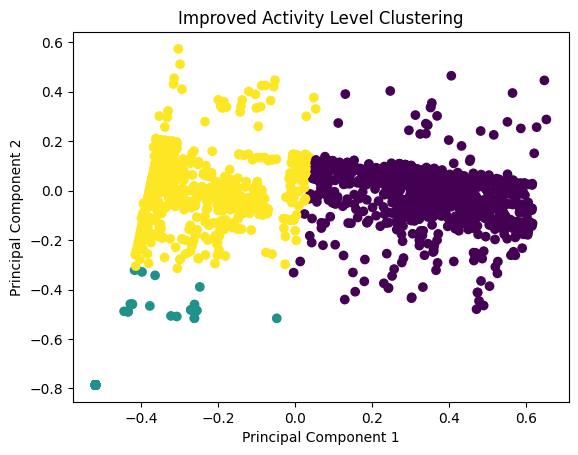

In [31]:
#DATA PREPROCESSING

# Select features (steps, heart_rate)
features = data[['Fitbit.Steps_LE', 'Fitbit.Heart_LE', 'Fitbit.Calories_LE']]  # Modify columns as per the dataset structure

# Handle missing values
features = features.fillna(features.mean())
features = features[(np.abs(stats.zscore(features)) < 3).all(axis=1)]
# Normalize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply log transformation to handle skewed data
features['Fitbit.Steps_LE'] = np.log1p(features['Fitbit.Steps_LE'])
features['Fitbit.Heart_LE'] = np.log1p(features['Fitbit.Heart_LE'])

# Ensure alignment of indices
features = features.reindex(data.index)

# Handle missing values if necessary
features = features.fillna(0)

# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)

# Ensure reduced_features aligns with data length
assert reduced_features.shape[0] == len(data), "Mismatch in data lengths!"

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['activity_level'] = kmeans.fit_predict(reduced_features)

# Visualize the clusters
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=data['activity_level'], cmap='viridis')
plt.title('Improved Activity Level Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# K-means Clustering


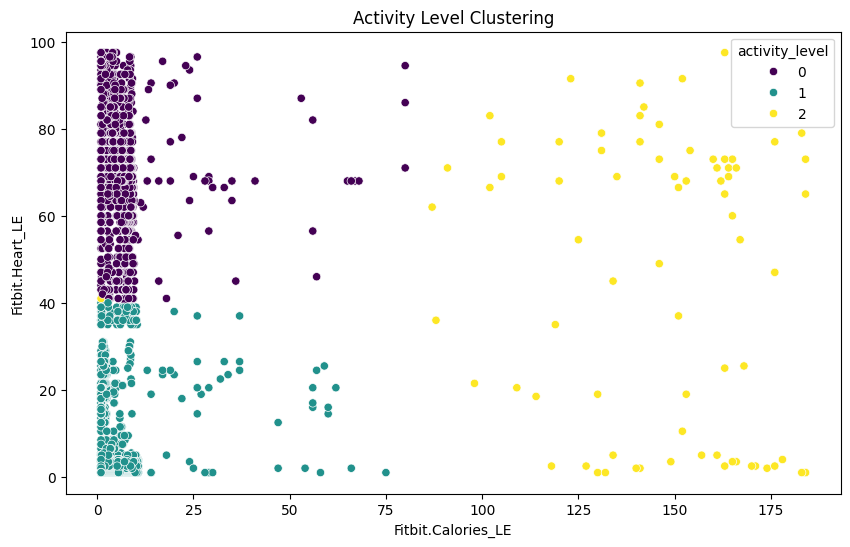

,Fitbit.Steps_LE,Fitbit.Calories_LE,Fitbit.Heart_LE,activity_label
0,1.0,1.0,132.000000,medium
1,1.0,1.0,132.777778,medium
2,1.0,1.0,129.888889,medium
3,1.0,1.0,129.142857,medium
4,1.0,3.5,134.555556,medium
...,...,...,...,...
2603,1.0,20.5,35.000000,medium
2604,1.0,20.5,35.000000,medium
2605,1.0,20.5,35.000000,medium
2606,1.0,20.5,35.000000,medium


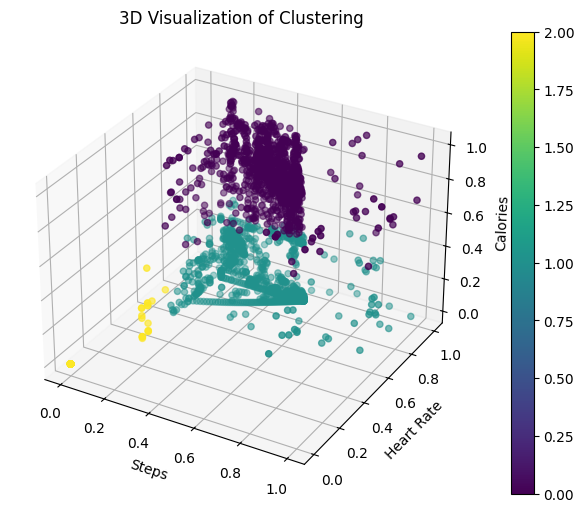

Accuracy with K=1: 99.23%
Accuracy with K=2: 99.23%
Accuracy with K=3: 99.04%
Accuracy with K=4: 99.04%
Accuracy with K=5: 99.04%
Accuracy with K=6: 99.04%
Accuracy with K=7: 99.23%
Accuracy with K=1: 99.23%
Accuracy with K=2: 99.23%
Accuracy with K=3: 99.04%
Accuracy with K=4: 99.04%
Accuracy with K=5: 99.04%
Accuracy with K=6: 99.04%
Accuracy with K=7: 99.23%


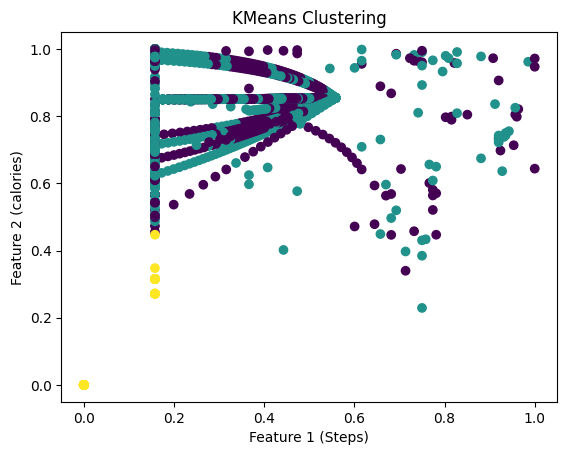

In [32]:
#### Apply K-means clustering with 3 clusters
data = data.dropna().reset_index(drop=True)

kmeans = KMeans(n_clusters=3, random_state=42)
data['activity_level'] = kmeans.fit_predict(scaled_features)

# Visualize clusters 2D
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Fitbit.Steps_LE'], y=data['Fitbit.Calories_LE'], hue=data['activity_level'], palette='viridis')
plt.title('Activity Level Clustering')
plt.xlabel('Fitbit.Calories_LE')
plt.ylabel('Fitbit.Heart_LE')
plt.show()

# Map clusters to activity labels
data['activity_label'] = data['activity_level'].map({0: 'low', 1: 'medium', 2: 'high'})
display(data[['Fitbit.Steps_LE', 'Fitbit.Calories_LE', 'Fitbit.Heart_LE', 'activity_label']])


#### 3D visualizaiton of clustering code
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(scaled_features[:, 0], scaled_features[:, 1], scaled_features[:, 2],
                     c=kmeans.labels_, cmap='viridis')
ax.set_title('3D Visualization of Clustering')
ax.set_xlabel('Steps')
ax.set_ylabel('Heart Rate')
ax.set_zlabel('Calories')
plt.colorbar(scatter)
plt.show()


# Define features and labels
X = data[['Fitbit.Steps_LE', 'Fitbit.Calories_LE', 'Fitbit.Heart_LE']]
y = data['activity_label']  # Assuming activity_label is already mapped to numerical values

# Scale features
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.2, random_state=42)

# Loop through K values and evaluate
for k in range(1, 8):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)  # Train the model
    y_pred = knn.predict(X_test)  # Make predictions on the test set
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
    print(f'Accuracy with K={k}: {accuracy * 100:.2f}%')



#### Go through K Nearest Neighbor and Print Accuracy Scores
# Loop through K values from 1 to 5
for k in range(1, 8):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)  # Train the model
    y_pred = knn.predict(X_test)  # Make predictions on the test set
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
    print(f'Accuracy with K={k}: {accuracy * 100:.2f}%')  # Print the accuracy


#### KMeans with Scaled Featues
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('KMeans Clustering')
plt.xlabel('Feature 1 (Steps)')
plt.ylabel('Feature 2 (calories)')
plt.show()

# PCA

,Unnamed: 0,age,gender,height,weight,Fitbit.Steps_LE,Fitbit.Heart_LE,Fitbit.Calories_LE,Fitbit.Distance_LE,EntropyFitbitHeartPerDay_LE,EntropyFitbitStepsPerDay_LE,RestingFitbitHeartrate_LE,CorrelationFitbitHeartrateSteps_LE,NormalizedFitbitHeartrate_LE,FitbitIntensity_LE,SDNormalizedFitbitHR_LE,FitbitStepsXDistance_LE,activity_trimmed
0,1,20,1,168.0,65.4,1.0,132.000000,1.0,1.0,5.938588,2.179799,130.428571,1.000000,1.571429,0.022587,1.000000,1.0,Lying
1,2,20,1,168.0,65.4,1.0,132.777778,1.0,1.0,5.938588,2.179799,130.428571,1.000000,2.349206,0.033767,1.000000,1.0,Lying
2,3,20,1,168.0,65.4,1.0,129.888889,1.0,1.0,5.938588,2.179799,130.428571,1.000000,-0.539683,-0.007757,1.000000,1.0,Lying
3,4,20,1,168.0,65.4,1.0,129.142857,1.0,1.0,5.938588,2.179799,130.428571,1.000000,-1.285714,-0.018480,1.000000,1.0,Lying
4,11,20,1,168.0,65.4,1.0,134.555556,3.5,1.0,5.938588,2.179799,130.428571,-0.493589,4.126984,0.059320,1.368007,1.0,Self Pace walk


Cluster means:
          FitbitStepsXDistance_LE  Fitbit.Heart_LE  Fitbit.Calories_LE
cluster                                                              
0                     148.654566        71.096392           37.509083
1                    1721.374942        48.337006           29.527237
2                     147.718652        82.330355           41.904427
3                   35791.680556       109.991020           45.201389
4                    1201.529747       138.734220           38.217391
      FitbitStepsXDistance_LE  Fitbit.Heart_LE  Fitbit.Calories_LE  cluster  \
0                         1.0       132.000000                 1.0        2   
1                         1.0       132.777778                 1.0        2   
2                         1.0       129.888889                 1.0        2   
3                         1.0       129.142857                 1.0        2   
4                         1.0       134.555556                 3.5        2   
...                 

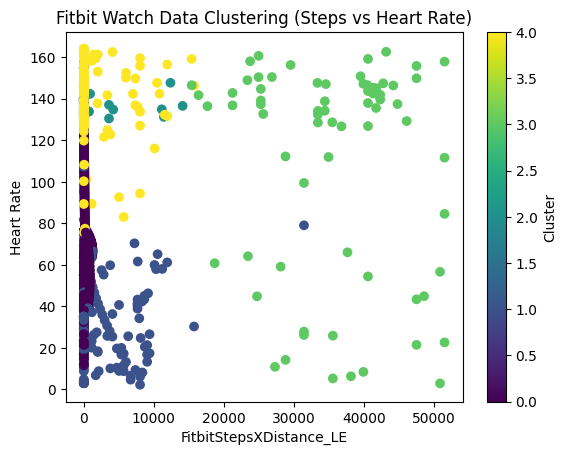

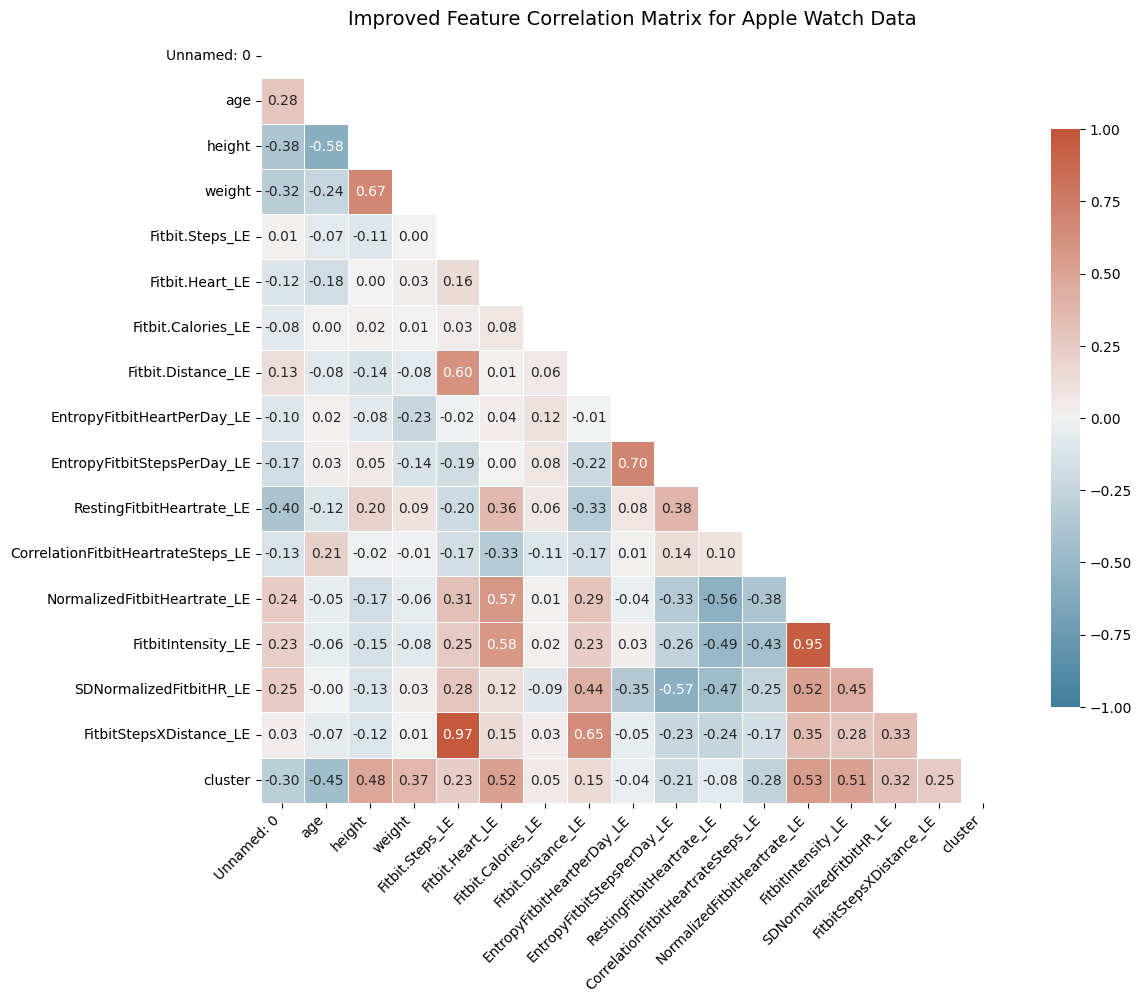

In [33]:
# Access your file
file_path = '/content/drive/MyDrive/cmpe 257 group project/Data Info/data_for_weka_fb.csv'
import pandas as pd
data = pd.read_csv(file_path)
display(data.head())
fitbit_data = pd.read_csv('/content/drive/MyDrive/cmpe 257 group project/Data Info/data_for_weka_fb.csv')

# Step 3: Feature Selection
# Select relevant features for analysis
features = [
    'Unnamed: 0', 'age', 'gender', 'height', 'weight', 'Fitbit.Steps_LE', 'Fitbit.Heart_LE', 'Fitbit.Calories_LE', 'Fitbit.Distance_LE'
    , 'EntropyFitbitHeartPerDay_LE', 'EntropyFitbitStepsPerDay_LE', 'RestingFitbitHeartrate_LE', 'CorrelationFitbitHeartrateSteps_LE'
    , 'NormalizedFitbitHeartrate_LE', 'FitbitIntensity_LE', 'SDNormalizedFitbitHR_LE', 'FitbitStepsXDistance_LE', 'activity_trimmed'
]

# Adjust as needed
fitbit_data = fitbit_data[features]
fitbit_data_encoded = pd.get_dummies(fitbit_data, columns=['gender', 'activity_trimmed'], drop_first=True)

# Apply StandardScaler to numerical columns only (excluding categorical columns)
scaler = StandardScaler()
fitbit_data_scaled = scaler.fit_transform(fitbit_data_encoded.drop(columns=['activity_level'], errors='ignore'))

# Step 5: K-Means Clustering (Unsupervised Learning)
from sklearn.cluster import KMeans

# Re-run K-Means with 3 clusters and multiple initializations for better results
kmeans = KMeans(n_clusters=5, n_init=10, random_state=42)
fitbit_clusters = kmeans.fit_predict(fitbit_data_scaled)

# Assign the clusters to the DataFrame
fitbit_data_encoded['cluster'] = fitbit_clusters

# Step 6: Calculate the mean values for each feature in each cluster
# Group by the cluster and calculate the mean for key features (steps, heart rate, calories)
#cluster_means = fitbit_data_encoded.groupby('cluster')[['Fitbit.Steps_LE', 'Fitbit.Heart_LE', 'Fitbit.Calories_LE']].mean()
cluster_means = fitbit_data_encoded.groupby('cluster')[['FitbitStepsXDistance_LE', 'Fitbit.Heart_LE', 'Fitbit.Calories_LE']].mean()
print("Cluster means:\n", cluster_means)

# Step 7: Manually map clusters to activity levels based on the feature means
# Adjust the mapping according to your data distribution after printing the cluster means.
activity_mapping = {
    0: 'Low Activity',
    1: 'Medium Activity',
    2: 'High Activity',
    3: 'Rest',
    4: 'Very High Activity'
}

# Step 8: Add the mapped activity levels to the dataset
fitbit_data_encoded['activity_level'] = fitbit_data_encoded['cluster'].map(activity_mapping)

# Display the updated dataset with activity levels
#print(fitbit_data_encoded[['Fitbit.Steps_LE', 'Fitbit.Heart_LE', 'Fitbit.Calories_LE', 'cluster', 'activity_level']])
print(fitbit_data_encoded[['FitbitStepsXDistance_LE', 'Fitbit.Heart_LE', 'Fitbit.Calories_LE', 'cluster', 'activity_level']])

# Step 9: Summary Statistics for Clusters
# Calculate average steps and heart rate for each activity level (mapped to 'Low', 'Medium', 'High')
#fitbit_avg_steps = fitbit_data_encoded.groupby('activity_level')['Fitbit.Steps_LE'].mean()
fitbit_avg_steps = fitbit_data_encoded.groupby('activity_level')['FitbitStepsXDistance_LE'].mean()
fitbit_avg_heart_rate = fitbit_data_encoded.groupby('activity_level')['Fitbit.Heart_LE'].mean()

# Create a summary DataFrame to display average metrics
summary = pd.DataFrame({
    'Fitbit Watch Average Steps': fitbit_avg_steps,
    'Fitbit Watch Average Heart Rate': fitbit_avg_heart_rate
})

# Print the summary statistics
print("\nSummary of Average Steps and Heart Rate for each Activity Level:\n", summary)

# Step 10: Visualization of Clusters
import matplotlib.pyplot as plt

# Apple Watch Clusters visualization for Steps vs Heart Rate
plt.scatter(fitbit_data_encoded['FitbitStepsXDistance_LE'], fitbit_data_encoded['Fitbit.Heart_LE'], c=fitbit_data_encoded['cluster'])
#plt.xlabel('Steps')
plt.xlabel('FitbitStepsXDistance_LE')
plt.ylabel('Heart Rate')
plt.title('Fitbit Watch Data Clustering (Steps vs Heart Rate)')
plt.colorbar(label='Cluster')
plt.show()
# Step 11: Improved Correlation Matrix and Heatmap
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Drop non-numeric columns like 'activity_level' before calculating correlation matrix
numeric_data = fitbit_data_encoded.select_dtypes(include=[float, int])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Set up the figure size for better readability
plt.figure(figsize=(12, 10))

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            annot=True, fmt=".2f", linewidths=0.5, cbar_kws={"shrink": 0.75})

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.title('Improved Feature Correlation Matrix for Apple Watch Data', fontsize=14)
plt.show()

#Random Forest

Class distribution:
 activity_level
Medium    1517
Low        798
High       293
Name: count, dtype: int64
Random Forest Accuracy: 100.00%

Classification Report:
               precision    recall  f1-score   support

        High       1.00      1.00      1.00       442
         Low       1.00      1.00      1.00       462
      Medium       1.00      1.00      1.00       462

    accuracy                           1.00      1366
   macro avg       1.00      1.00      1.00      1366
weighted avg       1.00      1.00      1.00      1366


Confusion Matrix:
 [[442   0   0]
 [  0 462   0]
 [  0   0 462]]


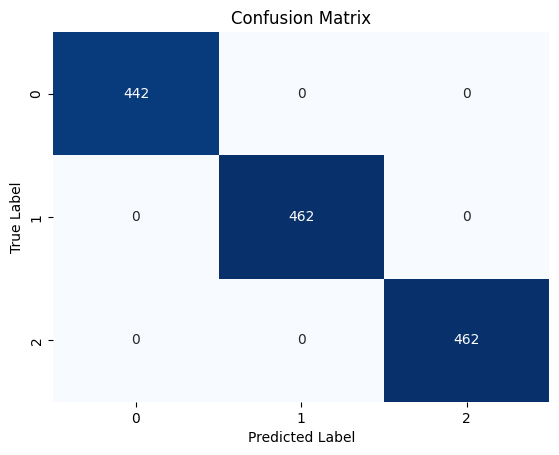

Model and scaler saved successfully.
Model and scaler loaded successfully.


In [34]:
# FINAL MODEL HYBRID VERSION FOR TRAINING AND TESTING THE MODEL
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/drive/MyDrive/cmpe 257 group project/Data Info/data_for_weka_fb.csv'
data = pd.read_csv(file_path)

# Scoring-based categorization function HYBRID
def categorize_activity(row, data):
    hear_rate_25th = data['Fitbit.Heart_LE'].quantile(0.25)
    hear_rate_75th = data['Fitbit.Heart_LE'].quantile(0.75)
    steps_25th = data['Fitbit.Steps_LE'].quantile(0.25)
    steps_75th = data['Fitbit.Steps_LE'].quantile(0.75)

    # Scoring system for medium overlap
    heart_rate_efficiency = row['Fitbit.Steps_LE'] / max(row['Fitbit.Heart_LE'], 1)
    row_score = (
        0.5 * (row['Fitbit.Heart_LE'] < hear_rate_75th) +
        0.3 * (row['Fitbit.Steps_LE'] >= steps_25th) +
        0.2 * (heart_rate_efficiency > 1.2)  # Example threshold
    )

    # Classification
    if row['Fitbit.Steps_LE'] >= steps_75th and row['Fitbit.Heart_LE'] >= hear_rate_75th:
        return 'High'
    elif row['Fitbit.Steps_LE'] <= steps_25th and row['Fitbit.Heart_LE'] <= hear_rate_25th:
        return 'Low'
    elif row_score > 0.5:
        return 'Medium'
    else:
        return 'Low'

# Apply the scoring-based categorization
data['activity_level'] = data.apply(categorize_activity, axis=1, data=data)

# Check class distribution
print("Class distribution:\n", data['activity_level'].value_counts())

# Prepare features and labels
features = ['Fitbit.Heart_LE', 'Fitbit.Steps_LE', 'Fitbit.Calories_LE', 'Fitbit.Distance_LE']
X = data[features]
y = data['activity_level']

if len(y.unique()) > 1:
    ros = RandomOverSampler(random_state=42)
    X_resampled, y_resampled = ros.fit_resample(X, y)

    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    rf_model = RandomForestClassifier(random_state=42, n_estimators=50, max_depth=5, class_weight="balanced")
    rf_model.fit(X_train_scaled, y_train)

    y_pred = rf_model.predict(X_test_scaled)

    print(f'Random Forest Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%')
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()
else:
    print("Target variable 'y' has only one class. Check the categorization logic.")

import joblib

# Save the Random Forest model and scaler
joblib.dump(rf_model, "random_forest_model_hybrid.pkl")
joblib.dump(scaler, "scaler.pkl")

print("Model and scaler saved successfully.")

# Load the model and scaler
rf_model = joblib.load("random_forest_model_hybrid.pkl")
scaler = joblib.load("scaler.pkl")

print("Model and scaler loaded successfully.")

#SVM AND DECISION TREE

Class distribution:
 activity_level
Medium    1517
Low        798
High       293
Name: count, dtype: int64

SVM Accuracy: 88.07%

SVM Classification Report:
               precision    recall  f1-score   support

        High       0.85      0.97      0.91       442
         Low       0.94      0.86      0.90       462
      Medium       0.86      0.81      0.83       462

    accuracy                           0.88      1366
   macro avg       0.88      0.88      0.88      1366
weighted avg       0.88      0.88      0.88      1366


SVM Confusion Matrix:
 [[430   0  12]
 [ 14 398  50]
 [ 61  26 375]]


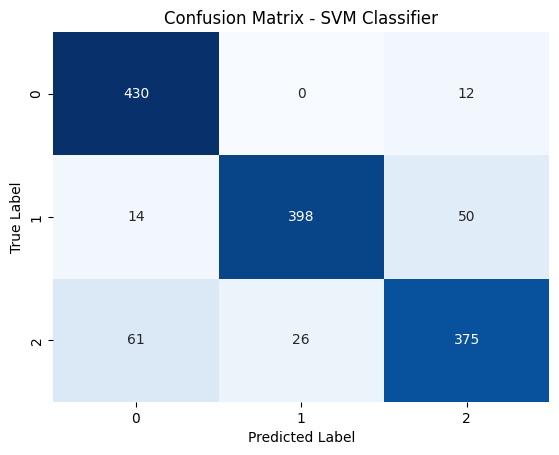


Decision Tree Accuracy: 100.00%

Decision Tree Classification Report:
               precision    recall  f1-score   support

        High       1.00      1.00      1.00       442
         Low       1.00      1.00      1.00       462
      Medium       1.00      1.00      1.00       462

    accuracy                           1.00      1366
   macro avg       1.00      1.00      1.00      1366
weighted avg       1.00      1.00      1.00      1366


Decision Tree Confusion Matrix:
 [[442   0   0]
 [  0 462   0]
 [  0   0 462]]


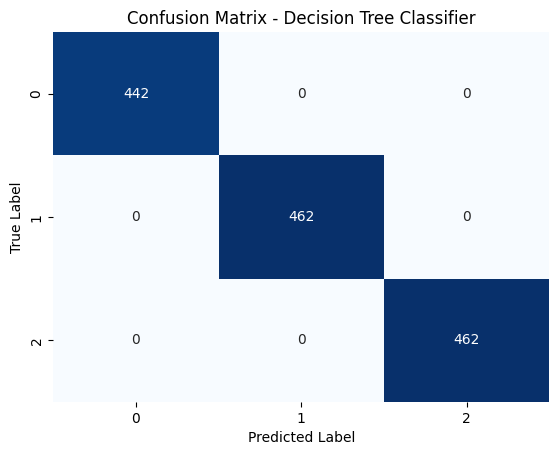

In [35]:
#SVM AND DECISION TREE FOR HYBRID VERSION
#Load the dataset
file_path = '/content/drive/MyDrive/cmpe 257 group project/Data Info/data_for_weka_fb.csv'
data = pd.read_csv(file_path)

# Scoring-based categorization function HYBRID
def categorize_activity(row, data):
    hear_rate_25th = data['Fitbit.Heart_LE'].quantile(0.25)
    hear_rate_75th = data['Fitbit.Heart_LE'].quantile(0.75)
    steps_25th = data['Fitbit.Steps_LE'].quantile(0.25)
    steps_75th = data['Fitbit.Steps_LE'].quantile(0.75)

    # Scoring system for medium overlap
    heart_rate_efficiency = row['Fitbit.Steps_LE'] / max(row['Fitbit.Heart_LE'], 1)
    row_score = (
        0.5 * (row['Fitbit.Heart_LE'] < hear_rate_75th) +
        0.3 * (row['Fitbit.Steps_LE'] >= steps_25th) +
        0.2 * (heart_rate_efficiency > 1.2)  # Example threshold
    )

    # Classification
    if row['Fitbit.Steps_LE'] >= steps_75th and row['Fitbit.Heart_LE'] >= hear_rate_75th:
        return 'High'
    elif row['Fitbit.Steps_LE'] <= steps_25th and row['Fitbit.Heart_LE'] <= hear_rate_25th:
        return 'Low'
    elif row_score > 0.5:
        return 'Medium'
    else:
        return 'Low'

# Apply the scoring-based categorization
data['activity_level'] = data.apply(categorize_activity, axis=1, data=data)

# Check class distribution
print("Class distribution:\n", data['activity_level'].value_counts())

# Prepare features and labels
features = ['Fitbit.Heart_LE', 'Fitbit.Steps_LE', 'Fitbit.Calories_LE', 'Fitbit.Distance_LE']
X = data[features]
y = data['activity_level']

# Handle class imbalance using RandomOverSampler
if len(y.unique()) > 1:
    ros = RandomOverSampler(random_state=42)
    X_resampled, y_resampled = ros.fit_resample(X, y)

    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

    # Standardize the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # ==== SVM Classifier ====
    svm_model = SVC(kernel='rbf', class_weight='balanced', random_state=42)
    svm_model.fit(X_train_scaled, y_train)

    # Predictions and evaluation for SVM
    y_pred_svm = svm_model.predict(X_test_scaled)
    print(f'\nSVM Accuracy: {accuracy_score(y_test, y_pred_svm) * 100:.2f}%')
    print("\nSVM Classification Report:\n", classification_report(y_test, y_pred_svm))
    print("\nSVM Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

    # Plot confusion matrix for SVM
    sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix - SVM Classifier')
    plt.show()

    # ==== Decision Tree Classifier ====
    dt_model = DecisionTreeClassifier(random_state=42, max_depth=5, class_weight='balanced')
    dt_model.fit(X_train_scaled, y_train)

    # Predictions and evaluation for Decision Tree
    y_pred_dt = dt_model.predict(X_test_scaled)
    print(f'\nDecision Tree Accuracy: {accuracy_score(y_test, y_pred_dt) * 100:.2f}%')
    print("\nDecision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))
    print("\nDecision Tree Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

    # Plot confusion matrix for Decision Tree
    sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix - Decision Tree Classifier')
    plt.show()
else:
    print("Target variable 'y' has only one class. Check the categorization logic.")

# Explatory Data Analysis

# VALIDATION USING APPLE DATA


In [36]:
# VALIDATION USING APPLE DATA
import pandas as pd
import joblib

# Load the new dataset (could have more columns)
apple_data = pd.read_csv("/content/drive/MyDrive/cmpe 257 group project/Data Info/data_for_weka_apple_modified.csv")


# List of features that were used for training
features = ['Fitbit.Heart_LE', 'Fitbit.Steps_LE', 'Fitbit.Calories_LE', 'Fitbit.Distance_LE']

# Ensure we only select the necessary features (in case the CSV has more columns)
X_new = apple_data[features]

# Load the trained Random Forest model and scaler
rf_model = joblib.load("random_forest_model_hybrid.pkl")
scaler = joblib.load("scaler.pkl")

# Scale the new data using the loaded scaler
X_new_scaled = scaler.transform(X_new)

# Predict using the loaded model
predictions = rf_model.predict(X_new_scaled)

# Add the predictions as a new column in the dataframe
apple_data['Predicted_Activity_Level'] = predictions

# Display the counts for each activity category
category_counts = apple_data['Predicted_Activity_Level'].value_counts()
print("\nCounts of Predicted Activity Levels(Hybrid):")
print(category_counts)

# Display the results on the screen (top 10 rows for brevity) (Hybrid)
print("\nPredicted Activity Levels (Top 10 Rows)(Hybrid):")
print(apple_data[['Predicted_Activity_Level']].head(10))  # You can print more rows if needed


Counts of Predicted Activity Levels(Hybrid):
Predicted_Activity_Level
High      1967
Medium    1109
Low        580
Name: count, dtype: int64

Predicted Activity Levels (Top 10 Rows)(Hybrid):
  Predicted_Activity_Level
0                     High
1                     High
2                     High
3                     High
4                     High
5                     High
6                     High
7                     High
8                     High
9                     High


# Code for Finding Top Athlete and Couch Potato

In [37]:
# File path to the CSV
file_path = '/content/drive/MyDrive/cmpe 257 group project/Data Info/data_for_weka_fb.csv'

try:
    # Load the dataset
    data = pd.read_csv(file_path)

    # Select only the required columns for calculations
    features = data[['Fitbit.Heart_LE', 'Fitbit.Distance_LE']]

    # Calculate athlete and couch potato scores using 'features'
    data['athlete_score'] = features['Fitbit.Distance_LE'] / features['Fitbit.Heart_LE']
    data['couch_potato_score'] = features['Fitbit.Heart_LE'] / features['Fitbit.Distance_LE']

    # Get the row indices for the top 5 athletes and couch potatoes
    top_athletes_indices = data.sort_values(by='athlete_score', ascending=False).head(10).index.tolist()
    top_couch_potatoes_indices = data.sort_values(by='couch_potato_score', ascending=False).head(10).index.tolist()

    # Return the results
    print("Row indices of the top 5 athletes:", top_athletes_indices)
    print("Row indices of the top 5 couch potatoes:", top_couch_potatoes_indices)

except FileNotFoundError:
    print("File not found. Please check the file path.")
except Exception as e:
    print(f"An error occurred: {e}")


Row indices of the top 5 athletes: [1169, 1905, 1164, 1168, 2589, 1191, 1908, 1167, 2269, 1166]
Row indices of the top 5 couch potatoes: [1355, 1352, 1358, 1357, 1356, 1354, 1353, 1632, 1410, 2566]


# VALIDATION For Athlete


In [38]:
## VALIDATION For Athlete
import pandas as pd
import joblib

# Load the new dataset (could have more columns)
athlete_data = pd.read_csv("/content/drive/MyDrive/cmpe 257 group project/Data Info/athlete_data_fb.csv")

# List of features that were used for training
features = ['Fitbit.Heart_LE', 'Fitbit.Steps_LE', 'Fitbit.Calories_LE', 'Fitbit.Distance_LE']

# Ensure we only select the necessary features (in case the CSV has more columns)
X_new = athlete_data[features]

# Load the trained Random Forest model and scaler
rf_model = joblib.load("random_forest_model_hybrid.pkl")
scaler = joblib.load("scaler.pkl")

# Scale the new data using the loaded scaler
X_new_scaled = scaler.transform(X_new)

# Predict using the loaded model
predictions = rf_model.predict(X_new_scaled)

# Add the predictions as a new column in the dataframe
athlete_data['Predicted_Activity_Level'] = predictions

# Display the counts for each activity category
category_counts = athlete_data['Predicted_Activity_Level'].value_counts()
print("\nCounts of Predicted Activity Levels(HYBRID) For Athlete:")
print(category_counts)

# Display the results on the screen (top 10 rows for brevity)
print("\nPredicted Activity Levels For Athlete(Top 10 Rows)(HYBRID):")
print(apple_data[['Predicted_Activity_Level']].head(10))  # You can print more rows if needed


Counts of Predicted Activity Levels(HYBRID) For Athlete:
Predicted_Activity_Level
Medium    79
Low       71
High      44
Name: count, dtype: int64

Predicted Activity Levels For Athlete(Top 10 Rows)(HYBRID):
  Predicted_Activity_Level
0                     High
1                     High
2                     High
3                     High
4                     High
5                     High
6                     High
7                     High
8                     High
9                     High


# VALIDATION For Couch Potato


In [39]:
## VALIDATION For Couch Potato
import pandas as pd
import joblib

# Load the new dataset (could have more columns)
athlete_data = pd.read_csv("/content/drive/MyDrive/cmpe 257 group project/Data Info/couch_potato_fb.csv")

# List of features that were used for training
features = ['Fitbit.Heart_LE', 'Fitbit.Steps_LE', 'Fitbit.Calories_LE', 'Fitbit.Distance_LE']

# Ensure we only select the necessary features (in case the CSV has more columns)
X_new = athlete_data[features]

# Load the trained Random Forest model and scaler
rf_model = joblib.load("random_forest_model_hybrid.pkl")
scaler = joblib.load("scaler.pkl")

# Scale the new data using the loaded scaler
X_new_scaled = scaler.transform(X_new)

# Predict using the loaded model
predictions = rf_model.predict(X_new_scaled)

# Add the predictions as a new column in the dataframe
athlete_data['Predicted_Activity_Level'] = predictions

# Display the counts for each activity category
category_counts = athlete_data['Predicted_Activity_Level'].value_counts()
print("\nCounts of Predicted Activity Levels(HYBRID) For Couch Potato:")
print(category_counts)

# Display the results on the screen (top 10 rows for brevity)
print("\nPredicted Activity Levels For Couch Potato(Top 10 Rows)(HYBRID):")
print(apple_data[['Predicted_Activity_Level']].head(10))  # You can print more rows if needed


Counts of Predicted Activity Levels(HYBRID) For Couch Potato:
Predicted_Activity_Level
Low       71
Medium    48
High       4
Name: count, dtype: int64

Predicted Activity Levels For Couch Potato(Top 10 Rows)(HYBRID):
  Predicted_Activity_Level
0                     High
1                     High
2                     High
3                     High
4                     High
5                     High
6                     High
7                     High
8                     High
9                     High


# VALIDATION WITH 3 DATA POINTS PER PERSON


In [40]:
# VALIDATION WITH 3 DATA POINTS PER PERSON
import pandas as pd
import joblib

#loading the data
apple_data = pd.read_csv("/content/drive/MyDrive/cmpe 257 group project/Data Info/Fitbit_Data_with_Exactly_3_Rows_per_Age.csv")

#the fetaures we will be using from the dataset
features = ['Fitbit.Heart_LE', 'Fitbit.Steps_LE', 'Fitbit.Calories_LE', 'Fitbit.Distance_LE']
X_new = apple_data[features] # to make sure only those feautres are used which are relevant

#laoding the model
rf_model = joblib.load("random_forest_model_hybrid.pkl")
scaler = joblib.load("scaler.pkl")

X_new_scaled = scaler.transform(X_new)
predictions = rf_model.predict(X_new_scaled)

# adding predictions
apple_data['Predicted_Activity_Level'] = predictions
category_counts = apple_data['Predicted_Activity_Level'].value_counts()
print("\nCounts of Predicted Activity Levels(HYBRID):")
print(category_counts)

print("\nPredicted Activity Levels (Top 10 Rows)(HYBRID):")
print(apple_data[['Predicted_Activity_Level']].head(10))


Counts of Predicted Activity Levels(HYBRID):
Predicted_Activity_Level
Low       32
Medium    21
High      19
Name: count, dtype: int64

Predicted Activity Levels (Top 10 Rows)(HYBRID):
  Predicted_Activity_Level
0                      Low
1                   Medium
2                     High
3                      Low
4                   Medium
5                     High
6                      Low
7                   Medium
8                     High
9                      Low
